In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline

In [43]:
j = 30
k = 60

features = pd.read_csv('daily_j' + str(j) + '_k' + str(k)+'_features.csv')
pct = pd.read_csv('daily_j' + str(j) + '_k' + str(k)+'_pct.csv')

<AxesSubplot:>

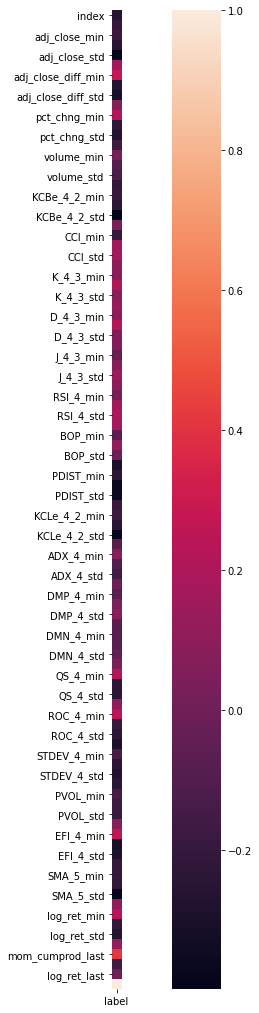

In [44]:
corr = features.corr() 
fig, ax = plt.subplots(figsize = (18, 18)) 
sns.heatmap(corr[['label']], square=True) 

In [45]:
correlated_features = set()
for i in range(len(corr.columns)):
    for a in range(i):
        if abs(corr.iloc[i, a]) > 0.90:
            colname = corr.columns[i]
            correlated_features.add(colname)

In [46]:
num_colums = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(features.select_dtypes(include=num_colums).columns)
df = features[numerical_columns]
df

,index,adj_close_mean,adj_close_min,adj_close_max,adj_close_std,adj_close_diff_mean,adj_close_diff_min,adj_close_diff_max,adj_close_diff_std,pct_chng_mean,...,SMA_5_std,log_ret_mean,log_ret_min,log_ret_max,log_ret_std,cumprod_last,mom_cumprod_last,rev_cumprod_last,log_ret_last,label
0,0,1138.982852,1073.869995,1178.099976,28.528165,1.100244,-24.719971,41.419922,10.992904,0.000976,...,25.561043,0.000930,-0.022390,0.037053,0.009699,0.039815,0.358708,-0.094005,0.007386,1.0
1,1,1117.527146,1067.949951,1173.599976,36.718511,-3.760999,-43.460083,48.849976,22.986997,-0.002956,...,30.654898,-0.003154,-0.039756,0.043035,0.020127,-0.064093,-0.084155,-0.070879,0.025514,0.0
2,2,1086.437500,1028.060059,1115.010010,21.431599,-0.064736,-74.769897,32.209961,22.780826,0.000146,...,14.183257,-0.000056,-0.070206,0.030850,0.020767,-0.001115,0.116015,0.095036,0.000063,1.0
3,3,1122.253634,1080.290039,1148.670044,20.226617,0.730475,-45.569946,23.840088,13.946638,0.000687,...,17.905030,0.000615,-0.041318,0.020973,0.012248,0.013625,0.162345,0.123332,-0.003088,1.0
4,4,1197.254749,1146.239990,1225.849976,18.670556,2.076001,-19.410034,38.140015,14.138749,0.001761,...,11.539320,0.001694,-0.016338,0.032732,0.011633,0.036223,0.064115,0.030093,-0.001380,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,62,3009.339995,2820.000000,3232.389893,118.798944,13.849500,-60.069824,90.209961,40.041249,0.004393,...,100.714104,0.004301,-0.020713,0.031015,0.013140,0.094530,0.208640,0.382049,-0.007830,0.0
63,63,3249.735906,3155.219971,3351.280029,52.096386,7.673340,-40.360107,42.300049,23.068791,0.002266,...,38.987080,0.002240,-0.012396,0.013317,0.006989,0.050512,0.022253,0.032776,0.000633,0.0
64,64,3345.662276,3236.919922,3419.439941,48.933242,4.171422,-78.650146,67.119873,43.851414,0.001259,...,33.779225,0.001180,-0.024007,0.019945,0.012817,0.026292,0.074093,-0.002936,0.017247,1.0
65,65,3599.062500,3446.830078,3699.120117,58.621400,13.278423,-41.739990,103.669922,35.918752,0.003585,...,42.693185,0.003532,-0.011631,0.029633,0.009871,0.073195,0.138465,0.529320,0.008797,0.0


In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = decomposition.PCA()
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1), 
                                                    df['label'], train_size=0.33, shuffle=False)
X_before = X_test


X_train.drop(columns=correlated_features, axis=1, inplace=True)
X_test.drop(columns=correlated_features, axis=1, inplace=True)


scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<AxesSubplot:>

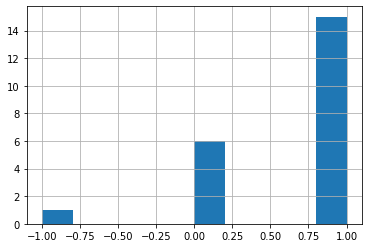

In [64]:
y_train.hist()

In [65]:
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', scaler),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
n_components = list(range(1,X_train.shape[1]+1,1))

In [66]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [67]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [68]:
clf_GS = GridSearchCV(pipe, parameters,n_jobs=-1,verbose=True)
clf_GS.fit(X_train, y_train)

Fitting 5 folds for each of 624 candidates, totalling 3120 fits
C:\Users\Staro\.virtualenvs\dsc190-FVH1D0fH\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Staro\.virtualenvs\dsc190-FVH1D0fH\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.77 0.73 0.73 0.73 0.65 0.52 0.52 0.52 0.52 0.65 0.69 0.57 0.6  0.65
 0.65 0.65 0.65  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 0.63 0.64 0.54 0.73
 0.69 0.57 0.6  0.61 0.6  0.65 0.56 0.65 0.6  0.6  0.6  0.65 0.65  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan 0.6

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]},
             verbose=True)

In [69]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


Best Criterion: gini
Best max_depth: 2
Best Number Of Components: 1

DecisionTreeClassifier(max_depth=2)


In [70]:
predictions = clf_GS.predict(X_test)
predictions

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.])

In [71]:
# scores = cross_val_score(clf_GS, X_train, y_train, cv=10)
#print('Cross-Validation Accuracy Scores', scores)

In [72]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

NameError: name 'scores' is not defined

In [76]:
X_before['label'] = predictions.tolist()
X_before

,index,adj_close_std,adj_close_diff_mean,adj_close_diff_min,adj_close_diff_max,pct_chng_mean,pct_chng_max,volume_mean,volume_min,volume_max,...,ROC_4_mean,ROC_4_max,STDEV_4_min,PVOL_mean,PVOL_min,EFI_4_mean,mom_cumprod_last,rev_cumprod_last,log_ret_last,label
22,22,18.981983,3.997140,-23.339966,23.479980,0.002214,0.013828,3.462271e+09,2.534060e+09,4.143200e+09,...,0.875732,2.744307,4.156940,6.075425e+12,4.490076e+12,1.137161e+10,0.009057,0.047509,0.008063,1.0
23,23,20.294836,2.875000,-16.380005,29.650024,0.001513,0.016648,3.082799e+09,1.307630e+09,5.097700e+09,...,0.707197,2.638405,2.283568,5.620491e+12,2.397304e+12,1.199087e+10,0.098319,0.105998,0.002304,1.0
24,24,18.875135,1.292382,-21.859985,28.180054,0.000688,0.015268,3.490592e+09,3.021350e+09,4.014530e+09,...,0.629454,2.584255,1.856230,6.459269e+12,5.671588e+12,8.891358e+09,0.027928,0.009495,-0.011770,1.0
25,25,15.973011,2.776001,-16.940063,19.330078,0.001428,0.010488,3.292124e+09,2.642500e+09,4.034680e+09,...,0.315532,2.707513,1.535022,6.158591e+12,4.946469e+12,5.839878e+09,0.065300,0.068147,0.009626,1.0
26,26,19.186506,3.339047,-13.940063,32.660034,0.001664,0.017213,3.025310e+09,1.998090e+09,4.336240e+09,...,0.220109,1.392148,1.618939,5.919884e+12,3.967088e+12,3.680381e+09,0.008189,-0.005393,0.001470,1.0
27,27,23.421132,2.575995,-13.100098,16.679932,0.001257,0.008532,2.634604e+09,2.233880e+09,3.072410e+09,...,0.768020,1.964576,1.654167,5.223416e+12,4.463114e+12,8.668383e+09,0.045399,0.035391,-0.006567,1.0
28,28,58.850368,1.725243,-89.559937,37.270020,0.000901,0.019574,3.985670e+09,2.912430e+09,6.090800e+09,...,0.718833,4.230360,4.683943,7.766621e+12,5.812307e+12,1.080015e+10,0.107311,0.007512,0.000350,1.0
29,29,36.247336,-1.785265,-37.619995,48.339966,-0.000771,0.024015,3.671497e+09,1.416980e+09,6.465530e+09,...,-0.393309,5.363102,4.282742,7.484183e+12,2.949982e+12,-3.675603e+09,0.005252,-0.014627,0.011563,0.0
30,30,20.188086,0.480006,-29.780029,21.850098,0.000236,0.010676,3.446898e+09,3.093680e+09,3.934010e+09,...,0.422545,2.455124,1.643979,7.216230e+12,6.519590e+12,1.005747e+10,0.059867,0.050243,-0.014275,1.0
31,31,12.284412,0.389549,-25.030029,22.780029,0.000196,0.010923,3.484178e+09,2.908420e+09,4.509680e+09,...,0.129019,1.525577,3.670734,7.311342e+12,6.085665e+12,-3.681967e+08,0.030073,0.006968,0.003767,1.0


In [77]:
performance =pct[['date','index', 'mom_pct_change','rev_pct_change','SP500_pct_change']].infer_objects()
performance['date'] = pd.to_datetime(performance['date'])
# output = date.merge(performance, how='right',left_index=True, right_index=True)[['date','index', 'mom_pct_change','rev_pct_change','SP500_pct_change']]
# output
# output.to_csv(csv_)
performance = performance.set_index('date')
performance = performance.merge(X_before[['label']], left_on='index', right_index=True) #example
performance['test_pct_change'] = performance.apply(lambda x: x['mom_pct_change'] if x['label']==1 else x['rev_pct_change'] if x['label']==-1 else 0,axis=1) # todo build more models and get their outputs. output results here

performance[['mom_return','rev_return', 'test_return']] = performance[['mom_pct_change','rev_pct_change', 'test_pct_change']].apply(lambda x: (x+1).cumprod()-1)#*100
#performance[['mom_return','rev_return', 'test_return']] = performance[['mom_pct_change','rev_pct_change', 'test_pct_change']].apply(lambda x: np.log(1 + x).cumsum())
performance
performance[['mom_return_diff','rev_return_diff', 'test_return_diff']] = performance[['mom_pct_change','rev_pct_change', 'test_pct_change']].diff()
# performance['mom_sharpe_ratio'] = performance['mom_return'].mean()/performance['mom_return'].std() * np.sqrt(252)

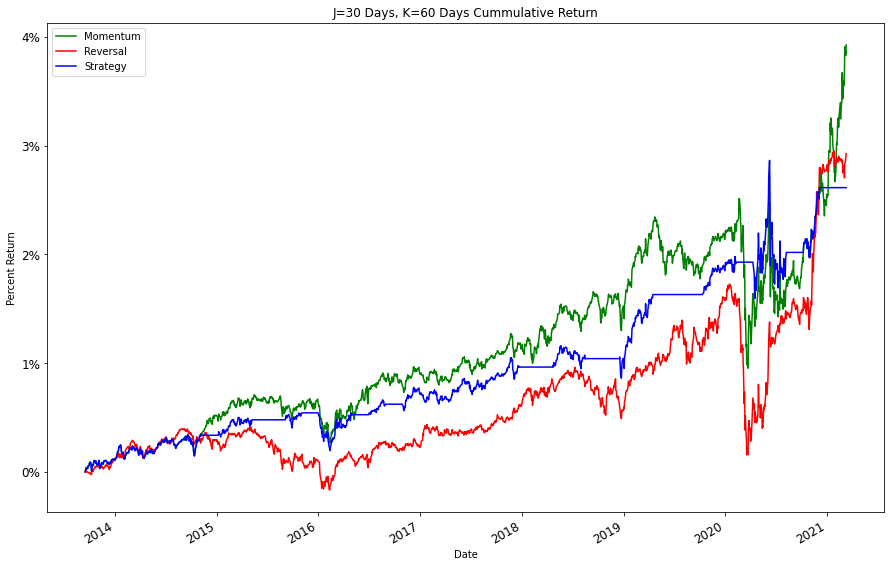

In [79]:
# import matplotlib.ticker as mtick

plt = performance[['mom_return','rev_return', 'test_return']].plot(figsize=(15,10),title='J={0} Days, K={1} Days Cummulative Return'.format(j,k),xlabel="Date",ylabel="Percent Return",fontsize=12,color=['green','red','blue'])
plt.legend(['Momentum','Reversal','Strategy'])
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
plt.yaxis.set_major_formatter(yticks)
plt.get_figure().savefig('performance_j{0}_k{1}.png'.format(j,k))